# Plots for the output of consistency.cpp

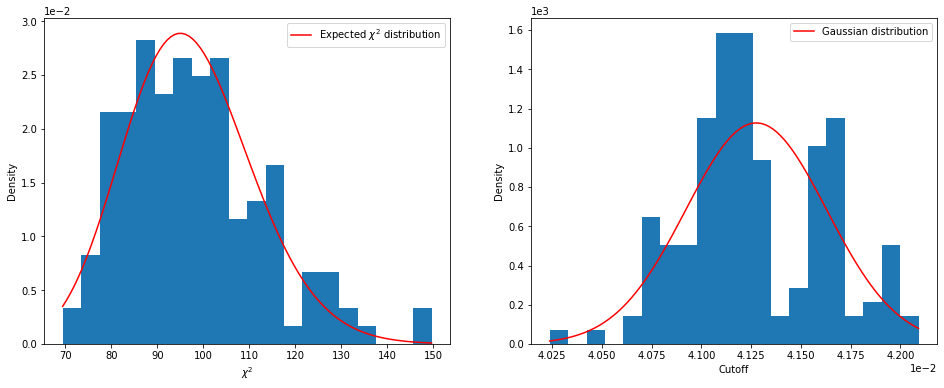

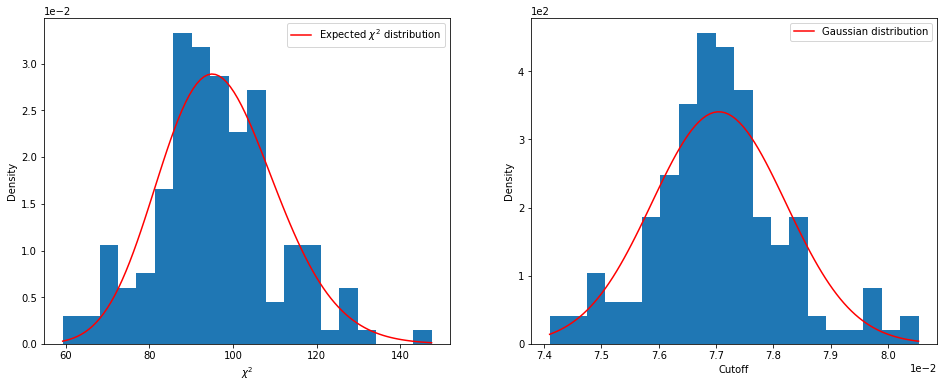

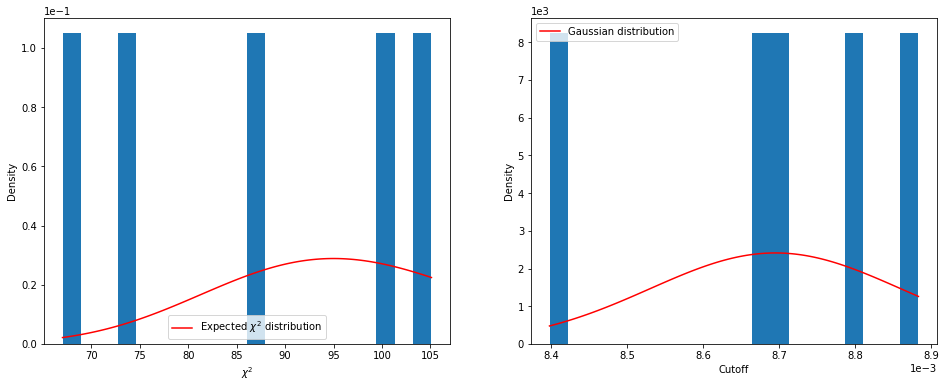

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

files = ["../figures/consistency/emd_25044/out.txt", "../figures/consistency/emd_13946/out.txt", "../figures/consistency/emd_12747/out.txt"]

for file in files:
    data = np.loadtxt(file, skiprows=1)
    ddof = data[:, 0]
    dchi2 = data[:, 1]
    dcutoff = data[:, 2]

    ### plot chi2 data ###
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    plt.sca(ax[0])
    n, bins, _ = plt.hist(dchi2, bins=20, density=True)
    plt.xlabel("$\chi^2$")
    plt.ylabel("Density")
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    ### plot chi2 distribution ###
    # check if all ddof are identical
    if not np.all(ddof == ddof[0]):
        print("Warning: number of degrees of freedom are not identical for each measurement.")

    x = np.linspace(bins[0], bins[-1], 100)
    plt.plot(x, chi2.pdf(x, df=ddof[0]), "r-", label="Expected $\chi^2$ distribution")
    plt.legend()

    ### plot dof data ###
    plt.sca(ax[1])
    n, bins, _ = plt.hist(dcutoff, bins=20, density=True)
    plt.xlabel("Cutoff")
    plt.ylabel("Density")
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    ### plot gaussian distribution ###
    x = np.linspace(bins[0], bins[-1], 100)
    plt.plot(x, norm.pdf(x, loc=np.mean(dcutoff), scale=np.std(dcutoff)), "r-", label="Gaussian distribution")
    plt.legend()
plt.show()